## Logic Based FizzBuzz Function [Software 1.0]

In [45]:
import pandas as pd

def fizzbuzz(n):
    
     # Logic Explanation: 
    # This program is a simple FizzBuzz problem.
    # Our task is to check if an integer is divisible by 3 then to return `Fizz`.
    # If it is divisible by 5, then the output should be `Buzz`.
    # If the integer is divisible by both 3 and 5, then the output should be `FizzBuzz`.
    # If not, then it should print `Other`.
    # % (modulo) operator checks the remainder.
    
     # Check whether a number is divisible by both 3 and 5.
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
     # Check whether a number is divisible by both 3.
    elif n % 3 == 0:
        return 'Fizz'
    # Check whether a number is divisible by both 5.
    elif n % 5 == 0:
        return 'Buzz'
     # If not any of the above, then return Other.
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [46]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # List is one of the collection in python. It is used for storing array of numbers.
    # It is ordered and changeable.
    # It also allows duplicate members.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Training data is used to train the machine learning algorithms 
    # It also helps in increasing the accuracy.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # Dataframes are two dimensional data structure. The data is aligned in a tabular fashion in rows and columns.
    # Here, inputData of range 101-1000 is stored into `input` column. The outputData which can have values of Fizz, Buzz, 
    # FizzBuzz and Other is stored in `label` column.
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    # This function is used to write into csv files. This function is used in creating training and testing.csv files.
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [47]:
def processData(dataset):
    
    # Why do we have to process?
    # Processing is necessary to have uniformity in input and the output values or normalizing the data. Also, computers operate in binaries.
    # Proper formatting of data helps in achieving better results and will led to much accurate predictions.
    # encodeData is representing a number in its corresponding bit representation. To increase the number of features, the inputs were
    # converted to a binary mode.
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [48]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # We have to process 1 to 1000 numbers. For representing 1000, atleast 10 bits are necessary.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [49]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            # If label is `FizzBuzz`, then store a value 3.
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            # If label is `Fizz`, then store a value 1.
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            # If label is `Buzz`, then store a value 2.
            processedLabel.append([2])
        else:
            # Other
            # If label is `Other`, then store a value 0.
            processedLabel.append([0])
            
    # This is used to convert array of labeled data to one-hot vector. 
    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

# This is the input neurons. The size is 10 as we have to train out data on 1000 numbers and this can be achieved using 10 bits.
input_size = 10

# Dropout is randomly setting a fraction rate of input units to 0 at each update during training time.
# It helps is preventing overfitting.
drop_out = 0.05

# This is a hidden layer.
first_dense_layer_nodes  = 290

# Added this for testing the accuracy prediction.
# third_dense_layer_nodes  = 256

# This is the output layer. The value is 4 as we have 4 different categories.
second_dense_layer_nodes = 4

def get_model():
    
     # Why do we need a model?
    # model is the artifact that is created once a training process ends.
    # model here is a type of sequential layer. A model definition also includes defining the input and output layer.
    
    # Why use Dense layer and then activation?
    # Dense layer is a 2D hidden layer. Dropouts cannot be applied to dense layers.
    # Activation takes the input values from connecting nodes and gives an output based on activation function used. 
    # If we use activation at first then there are chances of data losses  ar data being modified.
    
    # Why use sequential model with layers?
    # Sequential model is a linear stack of layers.
    # It has just one unique input and output layer respectively.
    # The first layer in a Sequential model needs to receive information about its input shape
    model = Sequential()
    
    # add() is used to add a new layer to out neural network.
    # Model needs to know the input shape it should expect.input_dim specifies that the input size is of 10 neurons.
    # Dense specifies that each neuron is connected with every other neuron.
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    
    # Added this for testing the accuracy prediction.
    # model.add(Dense(third_dense_layer_nodes))
    
    # ReLU ranges from 0 to 1, i.e for negative inputs the value is considered as 0 and for positive values the graph
    # increases exponentially.
    # ReLu is less computationally expensive.
    model.add(Activation('relu'))
    
    # Why dropout?
    # Dropout is only applied on hidden layers.
    # Dropout helps in regularization effect.
    # Dropout reduces overfitting.
    model.add(Dropout(drop_out))
    
     
    # This again adds a layer of 4 neurons corresponding to 4 outputs in the network.
    model.add(Dense(second_dense_layer_nodes))
    
    # Why Softmax?
    # Softmax function helps in approximating a probability distribution.
    # Softmax is used when we have more than 2 classes to categorize the output.
    model.add(Activation('softmax'))
    
    # This prints a summary representation of the model.
    model.summary()
    
    # Why use categorical_crossentropy?
    # This is a loss function.
    # This is a parameter required to compile a model.
    # An optimizer is one of the two arguments required for compiling a Keras model for example, rmsprop and Adagrad etc. 
    # An optimization algorithms helps us to minimize (or maximize) an Objective function
    # A metrics is a function which is used to judge the performance of your model for example, binary_accuracy and 
    # categorical_accuracy etc.
    model.compile(optimizer='AdaDelta',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [51]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [52]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 290)               3190      
_________________________________________________________________
activation_9 (Activation)    (None, 290)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 290)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 1164      
_________________________________________________________________
activation_10 (Activation)   (None, 4)                 0         
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [53]:
# This defines the way how a training data is splitted into training and validation sets. Here 0.2 specifies 80% 
# of the data will be used as training and rest 20% as validation set.
validation_data_split = 0.3

# This is the number of times the  input data is fed into the model.
num_epochs = 10000

# This is the size of input data which is fed at a time.
model_batch_size = 20

# This is size of batch of inputs to feed to the network for histograms computation.
tb_batch_size = 32

#This is the number of epochs with no improvement after which training will be stopped.
early_patience = 100

# Tensorboard is a visualization tool for visualizing dynamic graphs of of training and test metrics.
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)

# This is stopping the training when a monitored quantity has stopped improving.
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 630 samples, validate on 270 samples
Epoch 1/10000
630/630 [==============================] - 0s 672us/step - loss: 1.2065 - acc: 0.5302 - val_loss: 1.1637 - val_acc: 0.5148
Epoch 2/10000
630/630 [==============================] - 0s 104us/step - loss: 1.1586 - acc: 0.5302 - val_loss: 1.1616 - val_acc: 0.5333
Epoch 3/10000
630/630 [==============================] - 0s 101us/step - loss: 1.1533 - acc: 0.5333 - val_loss: 1.1557 - val_acc: 0.5333
Epoch 4/10000
630/630 [==============================] - 0s 112us/step - loss: 1.1449 - acc: 0.5333 - val_loss: 1.1641 - val_acc: 0.5333
Epoch 5/10000
630/630 [==============================] - 0s 119us/step - loss: 1.1431 - acc: 0.5333 - val_loss: 1.1497 - val_acc: 0.5333
Epoch 6/10000
630/630 [==============================] - 0s 103us/step - loss: 1.1363 - acc: 0.5333 - val_loss: 1.1648 - val_acc: 0.5333
Epoch 7/10000
630/630 [==============================] - 0s 114us/step - loss: 1.1385 - acc: 0.5333 - val_loss: 1.1620 - val_acc: 0.

630/630 [==============================] - 0s 92us/step - loss: 0.7293 - acc: 0.7079 - val_loss: 0.9598 - val_acc: 0.6111
Epoch 61/10000
630/630 [==============================] - 0s 89us/step - loss: 0.7155 - acc: 0.7254 - val_loss: 0.9520 - val_acc: 0.6148
Epoch 62/10000
630/630 [==============================] - 0s 89us/step - loss: 0.7029 - acc: 0.7254 - val_loss: 0.9480 - val_acc: 0.5963
Epoch 63/10000
630/630 [==============================] - 0s 93us/step - loss: 0.6877 - acc: 0.7508 - val_loss: 0.9451 - val_acc: 0.6111
Epoch 64/10000
630/630 [==============================] - 0s 89us/step - loss: 0.6873 - acc: 0.7444 - val_loss: 0.9439 - val_acc: 0.6185
Epoch 65/10000
630/630 [==============================] - 0s 103us/step - loss: 0.6868 - acc: 0.7429 - val_loss: 0.9346 - val_acc: 0.6222
Epoch 66/10000
630/630 [==============================] - 0s 101us/step - loss: 0.6754 - acc: 0.7444 - val_loss: 0.9323 - val_acc: 0.5963
Epoch 67/10000
630/630 [==============================

630/630 [==============================] - 0s 87us/step - loss: 0.3805 - acc: 0.9175 - val_loss: 0.8160 - val_acc: 0.6370
Epoch 120/10000
630/630 [==============================] - 0s 119us/step - loss: 0.3850 - acc: 0.9175 - val_loss: 0.8202 - val_acc: 0.6333
Epoch 121/10000
630/630 [==============================] - 0s 109us/step - loss: 0.3653 - acc: 0.9302 - val_loss: 0.7833 - val_acc: 0.6667
Epoch 122/10000
630/630 [==============================] - 0s 85us/step - loss: 0.3816 - acc: 0.9063 - val_loss: 0.8229 - val_acc: 0.6519
Epoch 123/10000
630/630 [==============================] - 0s 82us/step - loss: 0.3551 - acc: 0.9222 - val_loss: 0.7713 - val_acc: 0.6667
Epoch 124/10000
630/630 [==============================] - 0s 87us/step - loss: 0.3543 - acc: 0.9254 - val_loss: 0.8125 - val_acc: 0.6222
Epoch 125/10000
630/630 [==============================] - 0s 89us/step - loss: 0.3547 - acc: 0.9365 - val_loss: 0.7276 - val_acc: 0.6815
Epoch 126/10000
630/630 [=======================

630/630 [==============================] - 0s 90us/step - loss: 0.2219 - acc: 0.9619 - val_loss: 0.7312 - val_acc: 0.6815
Epoch 179/10000
630/630 [==============================] - 0s 85us/step - loss: 0.2311 - acc: 0.9524 - val_loss: 0.7148 - val_acc: 0.6778
Epoch 180/10000
630/630 [==============================] - 0s 84us/step - loss: 0.2150 - acc: 0.9651 - val_loss: 0.7513 - val_acc: 0.6667
Epoch 181/10000
630/630 [==============================] - 0s 84us/step - loss: 0.2214 - acc: 0.9571 - val_loss: 0.7647 - val_acc: 0.6741
Epoch 182/10000
630/630 [==============================] - 0s 84us/step - loss: 0.2014 - acc: 0.9698 - val_loss: 0.7571 - val_acc: 0.6815
Epoch 183/10000
630/630 [==============================] - 0s 89us/step - loss: 0.2112 - acc: 0.9698 - val_loss: 0.7402 - val_acc: 0.6667
Epoch 184/10000
630/630 [==============================] - 0s 93us/step - loss: 0.2028 - acc: 0.9794 - val_loss: 0.6980 - val_acc: 0.6926
Epoch 185/10000
630/630 [=========================

630/630 [==============================] - 0s 84us/step - loss: 0.1447 - acc: 0.9794 - val_loss: 0.7583 - val_acc: 0.6926
Epoch 238/10000
630/630 [==============================] - 0s 82us/step - loss: 0.1470 - acc: 0.9778 - val_loss: 0.7082 - val_acc: 0.7259
Epoch 239/10000
630/630 [==============================] - 0s 81us/step - loss: 0.1438 - acc: 0.9825 - val_loss: 0.8607 - val_acc: 0.6667
Epoch 240/10000
630/630 [==============================] - 0s 90us/step - loss: 0.1524 - acc: 0.9730 - val_loss: 0.7319 - val_acc: 0.7000
Epoch 241/10000
630/630 [==============================] - 0s 90us/step - loss: 0.1539 - acc: 0.9778 - val_loss: 0.7477 - val_acc: 0.7185
Epoch 242/10000
630/630 [==============================] - 0s 82us/step - loss: 0.1510 - acc: 0.9698 - val_loss: 0.6508 - val_acc: 0.7296
Epoch 243/10000
630/630 [==============================] - 0s 97us/step - loss: 0.1396 - acc: 0.9810 - val_loss: 0.8923 - val_acc: 0.6333
Epoch 244/10000
630/630 [=========================

630/630 [==============================] - 0s 100us/step - loss: 0.1192 - acc: 0.9714 - val_loss: 0.6897 - val_acc: 0.7296
Epoch 297/10000
630/630 [==============================] - 0s 92us/step - loss: 0.1089 - acc: 0.9857 - val_loss: 0.8461 - val_acc: 0.6926
Epoch 298/10000
630/630 [==============================] - 0s 85us/step - loss: 0.1133 - acc: 0.9794 - val_loss: 0.7872 - val_acc: 0.7000
Epoch 299/10000
630/630 [==============================] - 0s 79us/step - loss: 0.1113 - acc: 0.9778 - val_loss: 0.7537 - val_acc: 0.7074
Epoch 300/10000
630/630 [==============================] - 0s 79us/step - loss: 0.1182 - acc: 0.9746 - val_loss: 0.6994 - val_acc: 0.7481
Epoch 301/10000
630/630 [==============================] - 0s 78us/step - loss: 0.1005 - acc: 0.9857 - val_loss: 0.6683 - val_acc: 0.7519
Epoch 302/10000
630/630 [==============================] - 0s 84us/step - loss: 0.0958 - acc: 0.9857 - val_loss: 0.6884 - val_acc: 0.7333
Epoch 303/10000
630/630 [========================

630/630 [==============================] - 0s 111us/step - loss: 0.0816 - acc: 0.9889 - val_loss: 0.8240 - val_acc: 0.7074
Epoch 356/10000
630/630 [==============================] - 0s 81us/step - loss: 0.0886 - acc: 0.9794 - val_loss: 0.7901 - val_acc: 0.7111
Epoch 357/10000
630/630 [==============================] - 0s 81us/step - loss: 0.0859 - acc: 0.9857 - val_loss: 0.6500 - val_acc: 0.7778
Epoch 358/10000
630/630 [==============================] - 0s 79us/step - loss: 0.1190 - acc: 0.9778 - val_loss: 0.7329 - val_acc: 0.7222
Epoch 359/10000
630/630 [==============================] - 0s 84us/step - loss: 0.1006 - acc: 0.9746 - val_loss: 0.7609 - val_acc: 0.7333
Epoch 360/10000
630/630 [==============================] - 0s 87us/step - loss: 0.0905 - acc: 0.9825 - val_loss: 0.7720 - val_acc: 0.7296
Epoch 361/10000
630/630 [==============================] - 0s 85us/step - loss: 0.0916 - acc: 0.9825 - val_loss: 0.8342 - val_acc: 0.7148
Epoch 362/10000
630/630 [========================

630/630 [==============================] - 0s 93us/step - loss: 0.0708 - acc: 0.9905 - val_loss: 0.7811 - val_acc: 0.7222
Epoch 415/10000
630/630 [==============================] - 0s 87us/step - loss: 0.0841 - acc: 0.9825 - val_loss: 0.6690 - val_acc: 0.7556
Epoch 416/10000
630/630 [==============================] - 0s 85us/step - loss: 0.0765 - acc: 0.9810 - val_loss: 0.7238 - val_acc: 0.7333
Epoch 417/10000
630/630 [==============================] - 0s 93us/step - loss: 0.0706 - acc: 0.9841 - val_loss: 0.7904 - val_acc: 0.7370
Epoch 418/10000
630/630 [==============================] - 0s 79us/step - loss: 0.0707 - acc: 0.9810 - val_loss: 0.7089 - val_acc: 0.7444
Epoch 419/10000
630/630 [==============================] - 0s 81us/step - loss: 0.0671 - acc: 0.9841 - val_loss: 0.7510 - val_acc: 0.7444
Epoch 420/10000
630/630 [==============================] - 0s 82us/step - loss: 0.0531 - acc: 0.9984 - val_loss: 0.7451 - val_acc: 0.7370
Epoch 421/10000
630/630 [=========================

630/630 [==============================] - 0s 93us/step - loss: 0.0704 - acc: 0.9841 - val_loss: 0.7114 - val_acc: 0.7444
Epoch 474/10000
630/630 [==============================] - 0s 84us/step - loss: 0.0551 - acc: 0.9905 - val_loss: 0.9312 - val_acc: 0.6963
Epoch 475/10000
630/630 [==============================] - 0s 87us/step - loss: 0.0686 - acc: 0.9889 - val_loss: 0.7256 - val_acc: 0.7370
Epoch 476/10000
630/630 [==============================] - 0s 81us/step - loss: 0.0599 - acc: 0.9889 - val_loss: 0.7103 - val_acc: 0.7407
Epoch 477/10000
630/630 [==============================] - 0s 87us/step - loss: 0.0570 - acc: 0.9889 - val_loss: 0.6404 - val_acc: 0.7481
Epoch 478/10000
630/630 [==============================] - 0s 79us/step - loss: 0.0732 - acc: 0.9778 - val_loss: 0.6996 - val_acc: 0.7481
Epoch 479/10000
630/630 [==============================] - 0s 84us/step - loss: 0.0614 - acc: 0.9905 - val_loss: 0.7251 - val_acc: 0.7370
Epoch 480/10000
630/630 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012FE2E86128>,
      dtype=object)

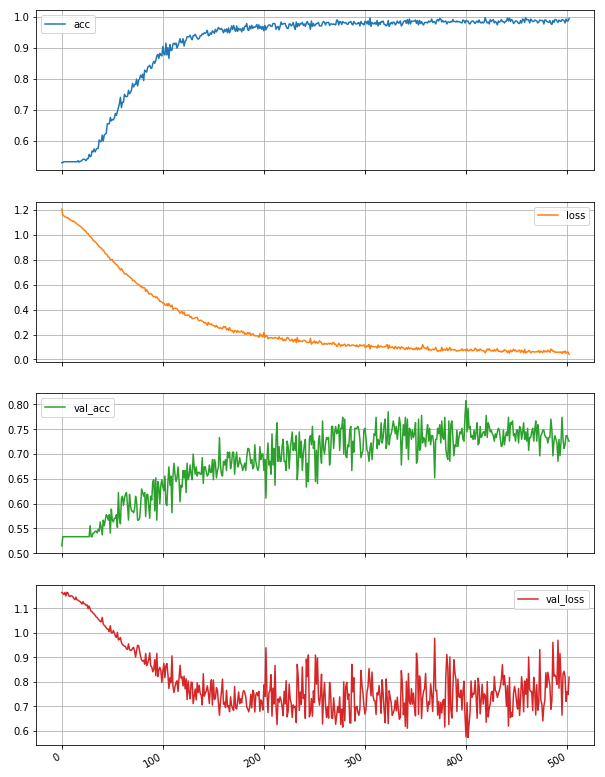

In [54]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [55]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [56]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "mikipadh")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50286289")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 1  Correct :99
Testing Accuracy: 99.0
